In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

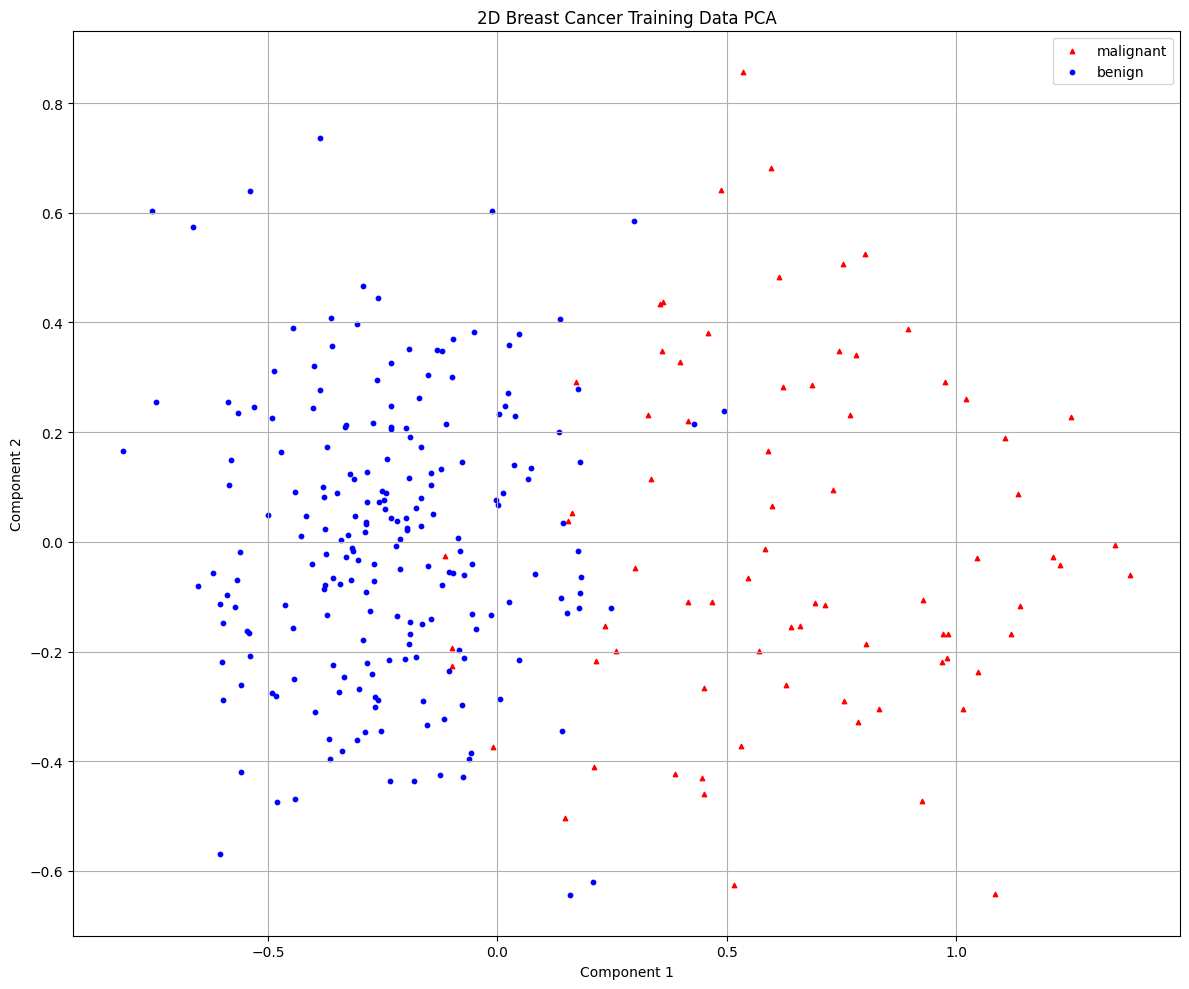

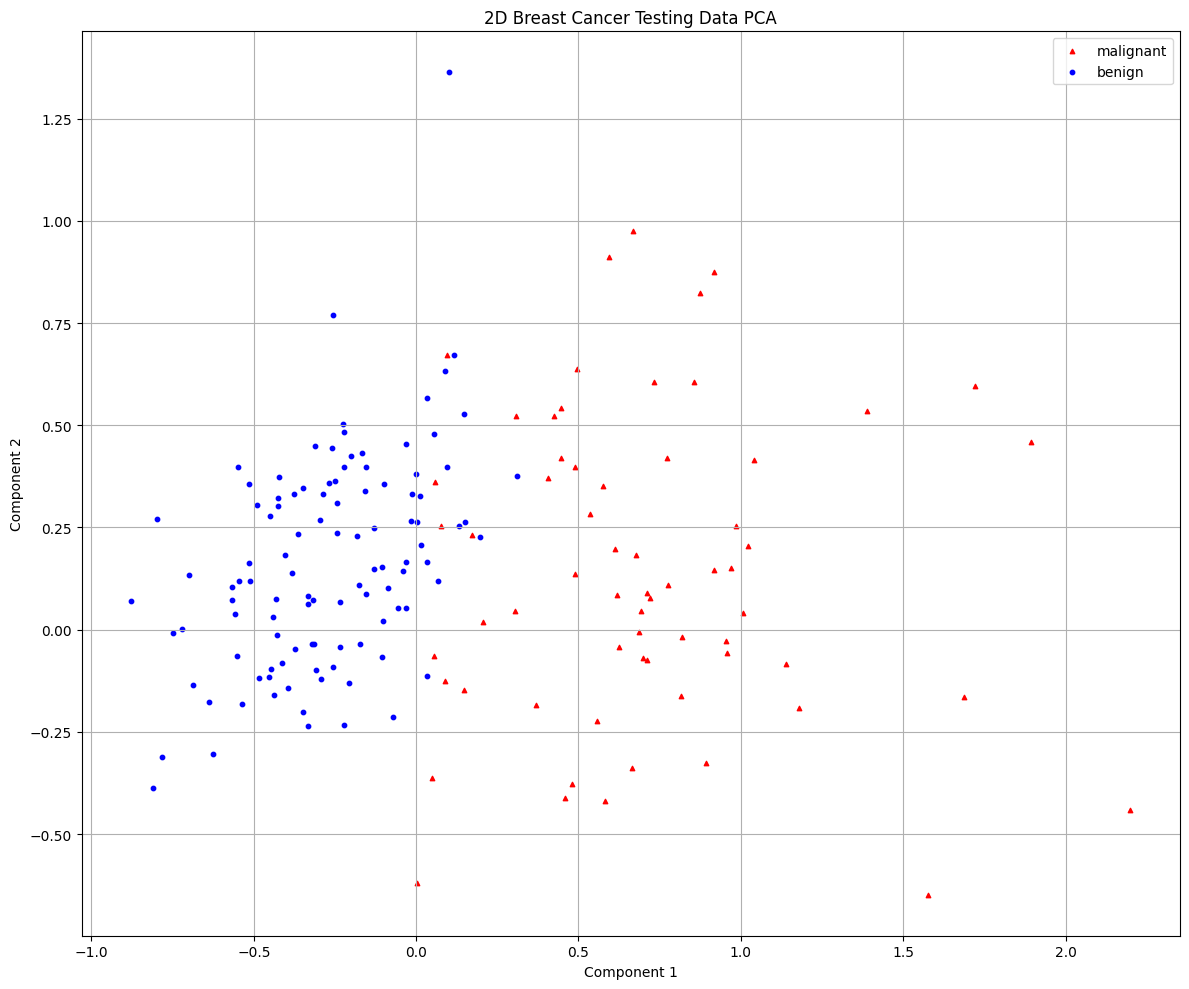

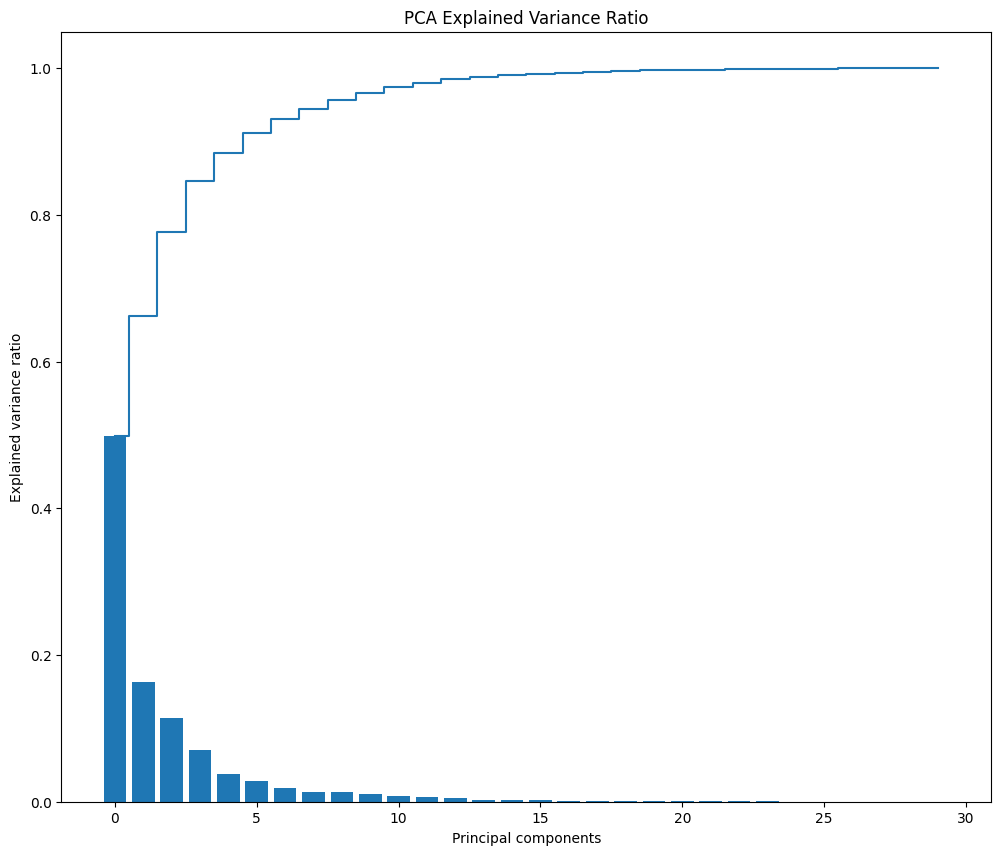

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

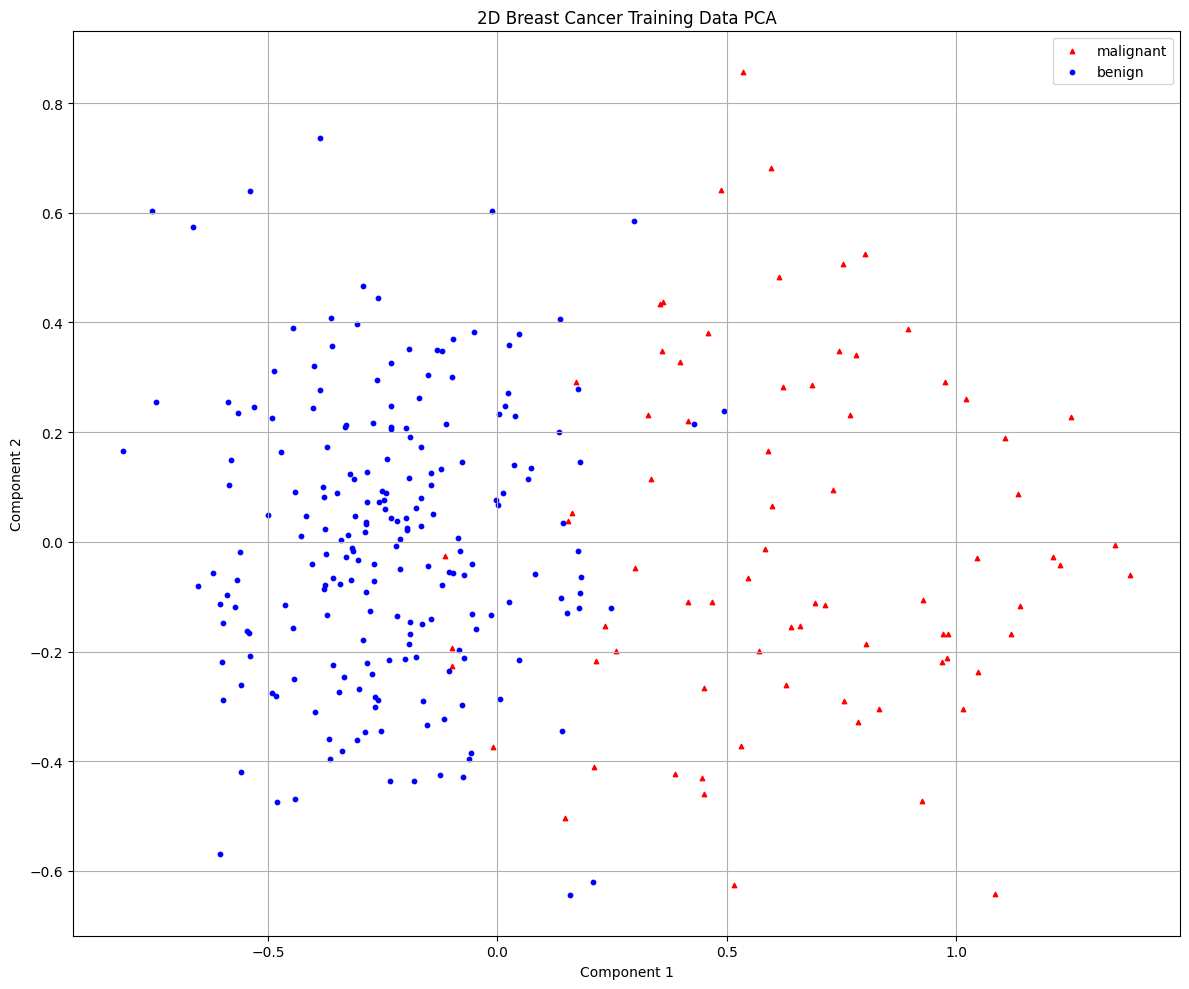

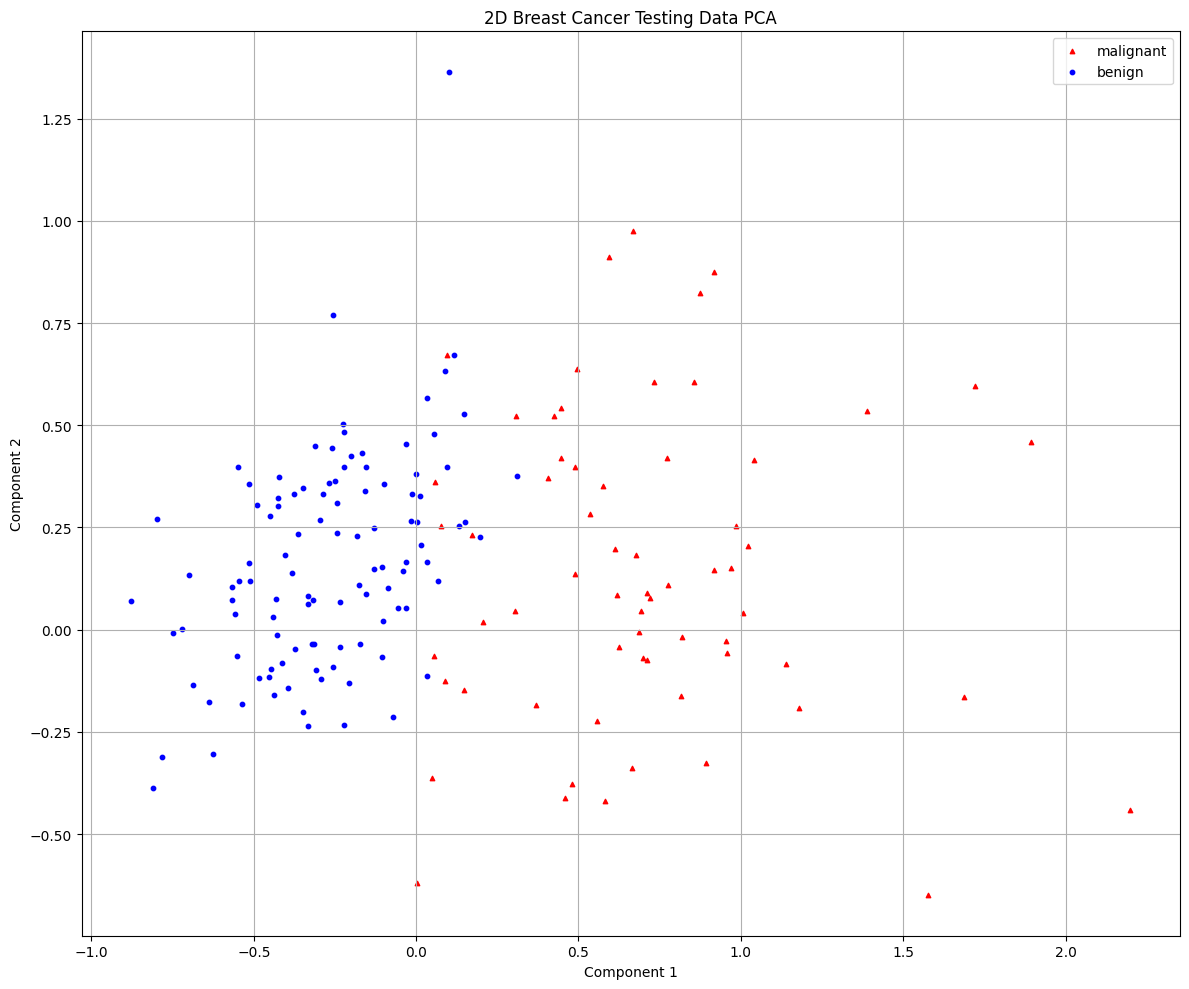

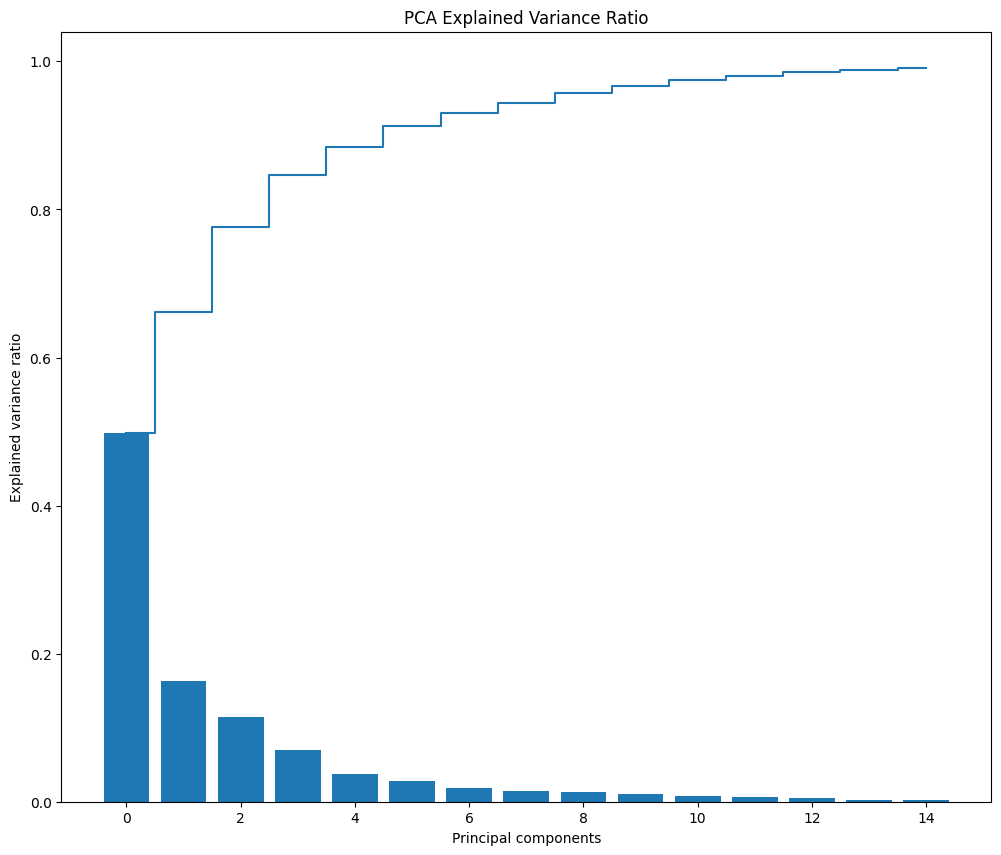

[I 2025-04-27 14:03:28,467] A new study created in memory with name: no-name-20a29255-d2ae-4ea9-9876-35bcb7bc9eab
[I 2025-04-27 14:04:36,889] Trial 0 finished with value: 0.9649727767695099 and parameters: {'n_estimators': 9662, 'max_depth': 5, 'learning_rate': 0.06483252556191593, 'subsample': 0.5780973849731594, 'colsample_bytree': 0.7677457263816623, 'gamma': 3.505196384436417, 'reg_alpha': 6.475762287094473e-05, 'reg_lambda': 0.21334058829685326}. Best is trial 0 with value: 0.9649727767695099.
[I 2025-04-27 14:05:10,188] Trial 1 finished with value: 0.9614640048396854 and parameters: {'n_estimators': 3380, 'max_depth': 4, 'learning_rate': 0.012368362885099045, 'subsample': 0.50195395530846, 'colsample_bytree': 0.7175286016765626, 'gamma': 1.152582849096424, 'reg_alpha': 3.191725803296967e-08, 'reg_lambda': 0.1402195308740215}. Best is trial 0 with value: 0.9649727767695099.
[I 2025-04-27 14:06:40,481] Trial 2 finished with value: 0.9510586811857229 and parameters: {'n_estimators':

Best trial:
Accuracy: 0.9720508166969146
Best hyperparameters:  {'n_estimators': 6967, 'max_depth': 12, 'learning_rate': 0.0878298039261993, 'subsample': 0.7571850074209314, 'colsample_bytree': 0.7276324097855517, 'gamma': 4.144072006652983, 'reg_alpha': 0.04443297090762415, 'reg_lambda': 0.002472582395090447}


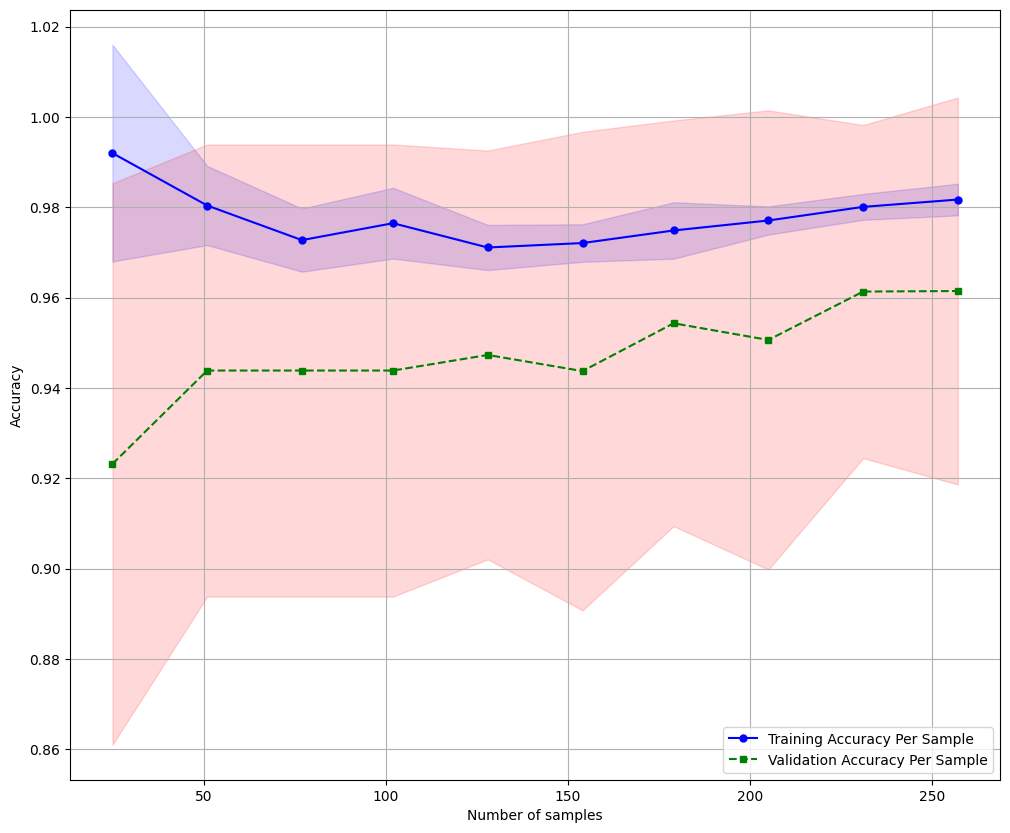

Confusion Matrix
[[ 54  10]
 [  1 106]]
Accuracy: 0.9357, Precision: 0.9138, Recall: 0.9907, F1: 0.9507, AUC: 0.9855


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)